# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.110547e+01     7.081421e+00
 * time: 0.004547834396362305
     1     2.771966e+01     5.190327e+00
 * time: 0.02080988883972168
     2     1.900029e+01     4.872590e+00
 * time: 0.04065203666687012
     3     1.238929e+01     2.399962e+00
 * time: 0.060469865798950195
     4     1.075167e+01     1.338945e+00
 * time: 0.08084797859191895
     5     9.807226e+00     1.331995e+00
 * time: 0.09728693962097168
     6     9.307277e+00     1.020580e+00
 * time: 0.11370491981506348
     7     9.006179e+00     1.102436e+00
 * time: 0.13023686408996582
     8     8.735334e+00     9.557660e-01
 * time: 0.1466660499572754
     9     8.459878e+00     6.720551e-01
 * time: 0.16312289237976074
    10     8.250212e+00     4.547522e-01
 * time: 0.17937588691711426
    11     8.103629e+00     5.082257e-01
 * time: 0.19557499885559082
    12     8.060135e+00     6.521481e-01
 * time: 0.20830702781677246
    13     8.049024e+00     6.691561e-01
 * time

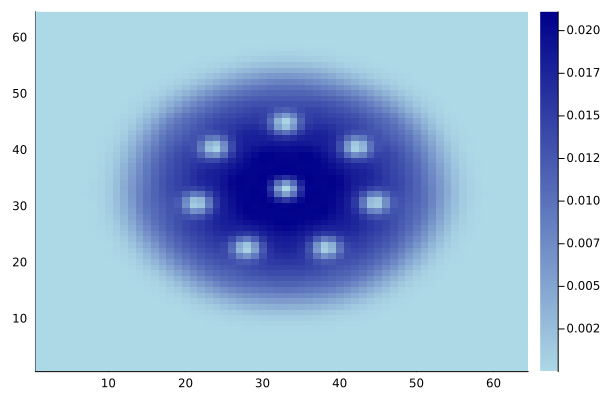

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)